In [1]:
from nipype.interfaces.fsl import Info 
Info.standard_image()

['MNI152_T1_1mm_first_brain_mask.nii.gz',
 'FSL_HCP1065_L1_1mm.nii.gz',
 'FMRIB58_FA_1mm.nii.gz',
 'MNI152_T1_2mm_brain_mask.nii.gz',
 'FSL_HCP1065_V3_1mm.nii.gz',
 'MNI152_T1_1mm_brain.nii.gz',
 'MNI152_T1_1mm_brain_mask_dil.nii.gz',
 'MNI152_T1_1mm.nii.gz',
 'FSL_HCP1065_MO_1mm.nii.gz',
 'FSL_HCP1065_V1_1mm.nii.gz',
 'MNI152_T1_1mm_BigFoV_facemask.nii.gz',
 'FSL_HCP1065_MD_1mm.nii.gz',
 'MNI152_T1_1mm_Hipp_mask_dil8.nii.gz',
 'FMRIB58_FA-skeleton_1mm.nii.gz',
 'MNI152_T1_2mm_brain_mask_deweight_eyes.nii.gz',
 'MNI152_T1_1mm_subbr_mask.nii.gz',
 'MNI152_T1_2mm_skull.nii.gz',
 'FSL_HCP1065_V2_1mm.nii.gz',
 'MNI152_T1_2mm_brain_mask_dil1.nii.gz',
 'FSL_HCP1065_L2_1mm.nii.gz',
 'MNI152_T1_2mm_VentricleMask.nii.gz',
 'MNI152_T1_0.5mm.nii.gz',
 'MNI152_T1_2mm_strucseg_periph.nii.gz',
 'LowerCingulum_1mm.nii.gz',
 'MNI152_T1_2mm_strucseg.nii.gz',
 'MNI152_T1_2mm_brain_mask_dil.nii.gz',
 'MNI152_T1_2mm_LR-masked.nii.gz',
 'MNI152_T1_1mm_brain_mask.nii.gz',
 'MNI152_T1_2mm_brain.nii.gz',
 'FS

# FMRI DATA ANALYSIS - NARPS DATASET TEAM X19V

**To use this notebook :** 
- Download fMRIprep datas available [**here**](https://openneuro.org/datasets/ds001734/versions/1.0.4) or in [**datalad**](http://datasets.datalad.org/?dir=/workshops/nih-2017/ds001734).
- Modify the paths:
    - **exp_dir**: directory where the ds001734-download repository is stored
    - **result_dir**: directory where the intermediate and final repositories will be stored
    - **working_dir**: name of the directory where intermediate results will be stored
    - **output_dir**: name of the directory where final results will be stored
    
- Select the number of subject you want to use by changing the value of the **nsub** variable.
    - For preprocessing & l1 analysis, all subjects will be analyzed. 
    - For l2 analysis, if **nsub < 108**, the required number of subject will be randomly selected from the dataset.

Botvinik-Nezer, R., Holzmeister, F., Camerer, C.F., Dreber, A., Huber, J., Johannesson, M., Kirchler, M., Iwanir, R., Mumford, J.A., ..., Nichols, T.E., Poldrack, R.A., Schonberg, T. (2020). Variability in the analysis of a single neuroimaging dataset by many teams. Nature. https://doi.org/10.1038/s41586-020-2314-9.

In [3]:
from os.path import join as opj
import os
import json
from lib import pipelines_1KB2

In [4]:
team_ID = "1KB2"

# Important directories
## exp_dir : where the data are stored (where the ds001734 directory is stored)
exp_dir = '/data/NARPS/ds001734-download'

## result_dir : where results are stored 
result_dir = '/data/NARPS/analytic_variability_fmri/data/derived/reproduced'

## working_dir : where the intermediate outputs will be store
working_dir = f"NARPS-{team_ID}-reproduced/intermediate_results"

## output_dir : where the final results will be store
output_dir = f"NARPS-{team_ID}-reproduced"

## Single subject - Single run analysis

### In/out Nodes + Important values

In [8]:
dir_list = os.listdir(exp_dir)

# Subject list (to which we will do the analysis)
subject_list = []
for dirs in dir_list:
    if dirs[0:3] == 'sub':
        subject_list.append(dirs[-3:])

# Run to use for this analysis
run_list = ['01', '02', '03', '04']

n_sub = 108

#TR
with open(opj(exp_dir, 'task-MGT_bold.json'), 'rt') as fp:
    task_info = json.load(fp)
TR = task_info['RepetitionTime']

#FWHM to smooth
fwhm = 7

In [17]:
subject_list = ["051"]

In [18]:
contrast_list = ['1', '2']

In [19]:
preprocess = pipelines_1KB2.get_preprocessing(exp_dir, result_dir, working_dir, output_dir, 
                                              subject_list, run_list, fwhm)

In [20]:
preprocess.run('MultiProc', plugin_args={'n_procs': 4})

211231-09:51:20,899 nipype.workflow INFO:
	 Workflow preprocessing settings: ['check', 'execution', 'logging', 'monitoring']
211231-09:51:20,934 nipype.workflow INFO:
	 Running in parallel.
211231-09:51:20,938 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 4 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 4/4.
211231-09:51:21,43 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.selectfiles_preproc" in "/data/NARPS/analytic_variability_fmri/data/derived/reproduced/NARPS-1KB2-reproduced/intermediate_results/preprocessing/_run_id_01_subject_id_051/selectfiles_preproc".
211231-09:51:21,46 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.selectfiles_preproc" in "/data/NARPS/analytic_variability_fmri/data/derived/reproduced/NARPS-1KB2-reproduced/intermediate_results/preprocessing/_run_id_02_subject_id_051/selectfiles_preproc".
211231-09:51:21,48 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.selectfiles_preproc" in "/data/NARPS/analytic_variab

211231-09:52:02,982 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 5 jobs ready. Free memory (GB): 112.67/113.27, Free processors: 1/4.
                     Currently running:
                       * preprocessing.anat2mni_linear
                       * preprocessing.anat2mni_linear
                       * preprocessing.anat2mni_linear
211231-09:52:03,43 nipype.workflow INFO:
	 [Job 20] Cached (preprocessing.binarize).
211231-09:52:04,223 nipype.workflow INFO:
	 [Node] Finished "anat2mni_linear", elapsed time 37.20232s.
211231-09:52:04,979 nipype.workflow INFO:
	 [Node] Finished "anat2mni_linear", elapsed time 35.964382s.
211231-09:52:04,981 nipype.workflow INFO:
	 [Job 13] Completed (preprocessing.anat2mni_linear).
211231-09:52:04,984 nipype.workflow INFO:
	 [MultiProc] Running 2 tasks, and 6 jobs ready. Free memory (GB): 112.87/113.27, Free processors: 2/4.
                     Currently running:
                       * preprocessing.anat2mni_linear
                    

211231-09:58:05,435 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.mean2anat_bbr" in "/data/NARPS/analytic_variability_fmri/data/derived/reproduced/NARPS-1KB2-reproduced/intermediate_results/preprocessing/_run_id_03_subject_id_051/mean2anat_bbr".
211231-09:58:05,442 nipype.workflow INFO:
	 [Node] Executing "mean2anat_bbr" <nipype.interfaces.fsl.preprocess.FLIRT>
211231-09:58:07,358 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 1 jobs ready. Free memory (GB): 112.47/113.27, Free processors: 0/4.
                     Currently running:
                       * preprocessing.mean2anat_bbr
                       * preprocessing.mean2anat_bbr
                       * preprocessing.mean2anat_bbr
                       * preprocessing.anat2mni_nonlinear
211231-09:58:12,44 nipype.workflow INFO:
	 [Node] Finished "anat2mni_nonlinear", elapsed time 356.984779s.
211231-09:58:13,364 nipype.workflow INFO:
	 [Job 27] Completed (preprocessing.anat2mni_nonlinear).
211231-09:58:13,

211231-10:15:30,495 nipype.workflow INFO:
	 [Node] Setting-up "preprocessing.smooth" in "/data/NARPS/analytic_variability_fmri/data/derived/reproduced/NARPS-1KB2-reproduced/intermediate_results/preprocessing/_run_id_03_subject_id_051/smooth".
211231-10:15:30,499 nipype.workflow INFO:
	 [Node] Executing "smooth" <nipype.interfaces.fsl.preprocess.SUSAN>
211231-10:15:32,421 nipype.workflow INFO:
	 [MultiProc] Running 4 tasks, and 0 jobs ready. Free memory (GB): 112.47/113.27, Free processors: 0/4.
                     Currently running:
                       * preprocessing.smooth
                       * preprocessing.smooth
                       * preprocessing.warp_all
                       * preprocessing.warp_all
211231-10:15:32,949 nipype.workflow INFO:
	 [Node] Finished "warp_all", elapsed time 963.379382s.
211231-10:15:34,422 nipype.workflow INFO:
	 [Job 32] Completed (preprocessing.warp_all).
211231-10:15:34,425 nipype.workflow INFO:
	 [MultiProc] Running 3 tasks, and 1 jobs r

## Second level analysis - Concatenate runs

In [9]:
l2_analysis = pipelines_1KB2.get_l2_analysis(subject_list, contrast_list, run_list, exp_dir, 
                                             output_dir, working_dir, result_dir)

In [10]:
l2_analysis.run('MultiProc', plugin_args={'n_procs': 8})

211117-16:19:44,157 nipype.workflow INFO:
	 Workflow l2_analysis settings: ['check', 'execution', 'logging', 'monitoring']
211117-16:19:44,174 nipype.workflow INFO:
	 Running in parallel.
211117-16:19:44,177 nipype.workflow INFO:
	 [MultiProc] Running 0 tasks, and 3 jobs ready. Free memory (GB): 113.27/113.27, Free processors: 8/8.
211117-16:19:44,271 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis.l2model_2ndlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-X19V-reproduced/intermediate_results/l2_analysis/l2model_2ndlevel".
211117-16:19:44,272 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis.selectfiles_2ndlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-X19V-reproduced/intermediate_results/l2_analysis/_contrast_id_1_subject_id_001/selectfiles_2ndlevel".
211117-16:19:44,272 nipype.workflow INFO:
	 [Node] Setting-up "l2_analysis.selectfiles_2ndlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-X19V-reprod

## Third level analysis - Group level 

In [6]:
n_sub = len(subject_list)

In [8]:
l3_analysis_equalRange = pipelines_1KB2.get_group_workflow(subject_list, n_sub, contrast_list, "equalRange", exp_dir, 
                                             output_dir, working_dir, result_dir)

l3_analysis_equalIndiff = pipelines_1KB2.get_group_workflow(subject_list, n_sub, contrast_list, "equalIndifference", 
                                                            exp_dir, output_dir, working_dir, result_dir)

l3_analysis_groupComp = pipelines_1KB2.get_group_workflow(subject_list, n_sub, contrast_list, "groupComp", exp_dir, 
                                                         output_dir, working_dir, result_dir)

211102-14:07:56,501 nipype.workflow INFO:
	 Generated workflow graph: /home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalRange_nsub_60/graph.png (graph2use=colored, simple_form=True).


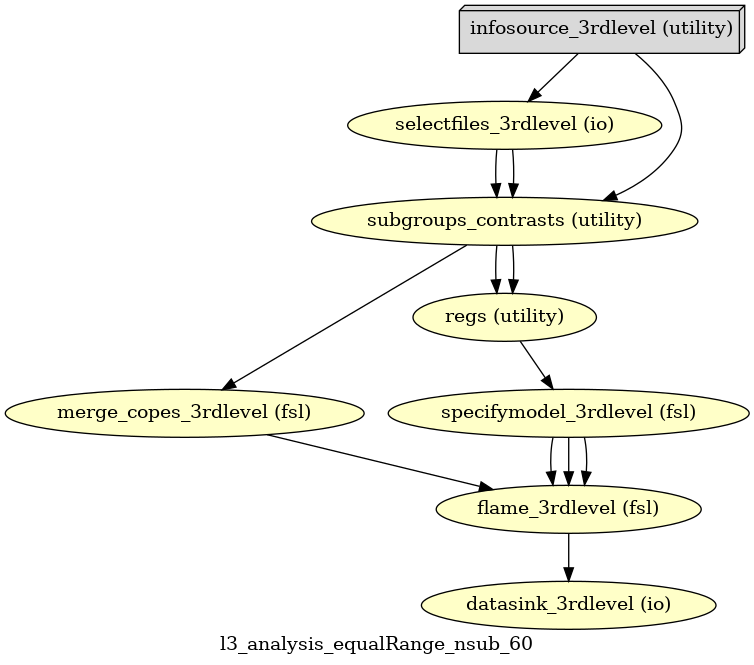

In [9]:
# Create analysis output graph
l3_analysis_equalRange.write_graph(graph2use='colored', format='png', simple_form=True)

# Visualize the graph
from IPython.display import Image
Image(filename=opj(l3_analysis_equalRange.base_dir, 'l3_analysis_equalRange_nsub_60', 'graph.png'))

In [ ]:
l3_analysis_equalRange.run()

In [18]:
l3_analysis_equalIndiff.run()

211102-14:14:34,561 nipype.workflow INFO:
	 Workflow l3_analysis_equalIndifference_nsub_60 settings: ['check', 'execution', 'logging', 'monitoring']
211102-14:14:34,584 nipype.workflow INFO:
	 Running serially.
211102-14:14:34,585 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_60.selectfiles_3rdlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalIndifference_nsub_60/_contrast_id_2/selectfiles_3rdlevel".
211102-14:14:34,589 nipype.workflow INFO:
	 [Node] Running "selectfiles_3rdlevel" ("nipype.interfaces.io.SelectFiles")
211102-14:14:34,597 nipype.workflow INFO:
	 [Node] Finished "l3_analysis_equalIndifference_nsub_60.selectfiles_3rdlevel".
211102-14:14:34,598 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_60.subgroups_contrasts" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalIndi

211102-14:15:59,368 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_60.merge_copes_3rdlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalIndifference_nsub_60/_contrast_id_1/merge_copes_3rdlevel".
211102-14:15:59,375 nipype.workflow INFO:
	 [Node] Cached "l3_analysis_equalIndifference_nsub_60.merge_copes_3rdlevel" - collecting precomputed outputs
211102-14:15:59,376 nipype.workflow INFO:
	 [Node] "l3_analysis_equalIndifference_nsub_60.merge_copes_3rdlevel" found cached.
211102-14:15:59,377 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_equalIndifference_nsub_60.regs" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_equalIndifference_nsub_60/_contrast_id_1/regs".
211102-14:15:59,383 nipype.workflow INFO:
	 [Node] Cached "l3_analysis_equalIndifference_nsub_60.regs" - collecting precomputed outputs
211102-14:15:5

In [19]:
l3_analysis_groupComp.run()

211102-14:17:29,339 nipype.workflow INFO:
	 Workflow l3_analysis_groupComp_nsub_60 settings: ['check', 'execution', 'logging', 'monitoring']
211102-14:17:29,361 nipype.workflow INFO:
	 Running serially.
211102-14:17:29,363 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_60.selectfiles_3rdlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_groupComp_nsub_60/_contrast_id_2/selectfiles_3rdlevel".
211102-14:17:29,366 nipype.workflow INFO:
	 [Node] Running "selectfiles_3rdlevel" ("nipype.interfaces.io.SelectFiles")
211102-14:17:29,375 nipype.workflow INFO:
	 [Node] Finished "l3_analysis_groupComp_nsub_60.selectfiles_3rdlevel".
211102-14:17:29,375 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_60.merge_copes_3rdlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_groupComp_nsub_60/_contrast_id_2/merge_copes_3rd

211102-14:22:28,977 nipype.workflow INFO:
	 [Node] Cached "l3_analysis_groupComp_nsub_60.subgroups_contrasts" - collecting precomputed outputs
211102-14:22:28,977 nipype.workflow INFO:
	 [Node] "l3_analysis_groupComp_nsub_60.subgroups_contrasts" found cached.
211102-14:22:28,978 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_60.regs" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_groupComp_nsub_60/_contrast_id_1/regs".
211102-14:22:28,983 nipype.workflow INFO:
	 [Node] Cached "l3_analysis_groupComp_nsub_60.regs" - collecting precomputed outputs
211102-14:22:28,984 nipype.workflow INFO:
	 [Node] "l3_analysis_groupComp_nsub_60.regs" found cached.
211102-14:22:28,985 nipype.workflow INFO:
	 [Node] Setting-up "l3_analysis_groupComp_nsub_60.specifymodel_3rdlevel" in "/home/analytic_variability_fmri/data/derived/reproduced/NARPS-4TQ6-reproduced/intermediate_results/l3_analysis_groupComp_nsub_60/_contra

In [10]:
pipelines_1KB2.reorganize_results(result_dir, output_dir, 22, team_ID)

Results files of team 1KB2 reorganized.
